In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


In [117]:
ice=pd.read_csv("Ice_cream selling data.csv")
ice

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [118]:
X=ice[['Temperature (°C)']]
y=ice['Ice Cream Sales (units)']

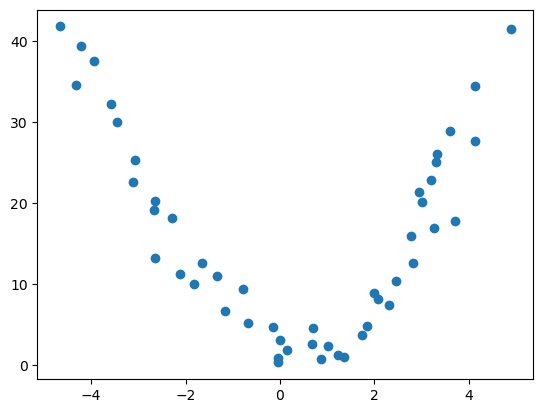

In [119]:
plt.scatter(X,y)
# plt.plot(X,y)

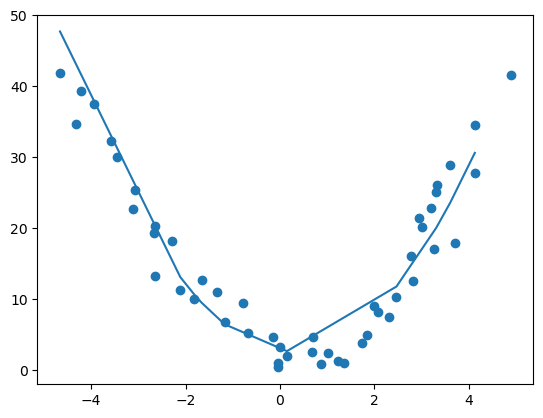

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
poly=PolynomialFeatures(degree=2,include_bias=False)
X_sorted = X_test.sort_values(by=X_test.columns[0])
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_sorted)

lr=LinearRegression()
lr.fit(X_train_trans,y_train)

plt.scatter(X,y)
plt.plot(X_sorted,lr.predict(X_test_trans))

In [121]:
X_sorted

,Temperature (°C)
0,-4.662263
12,-2.111870
13,-1.818938
14,-1.660348
16,-1.173123
23,0.149245
35,2.471946
42,3.316073
44,3.610778
47,4.133534


In [122]:
lr.coef_

array([-0.96115771,  1.86322401])

In [123]:
X_train_trans

array([[-4.21398476e+00,  1.77576676e+01],
       [-2.65228679e+00,  7.03462523e+00],
       [-7.73330043e-01,  5.98039356e-01],
       [ 1.74000001e+00,  3.02760004e+00],
       [ 6.93598873e-01,  4.81079396e-01],
       [ 4.13086796e+00,  1.70640701e+01],
       [ 1.35981267e+00,  1.84909051e+00],
       [ 1.02418081e+00,  1.04894634e+00],
       [-4.31655945e+00,  1.86326855e+01],
       [ 6.88780908e-01,  4.74419139e-01],
       [ 2.07510060e+00,  4.30604249e+00],
       [ 2.95993209e+00,  8.76119799e+00],
       [-1.49634867e-01,  2.23905933e-02],
       [ 2.78483646e+00,  7.75531413e+00],
       [-2.65149803e+00,  7.03044182e+00],
       [-3.57855372e+00,  1.28060467e+01],
       [-3.10844012e+00,  9.66239999e+00],
       [-3.94966109e+00,  1.55998227e+01],
       [ 3.02087431e+00,  9.12568162e+00],
       [-3.45571170e+00,  1.19419433e+01],
       [ 1.99931037e+00,  3.99724195e+00],
       [ 1.24071162e+00,  1.53936532e+00],
       [-3.61564977e-02,  1.30729232e-03],
       [ 8.

In [124]:
X_train_trans.shape

(39, 2)

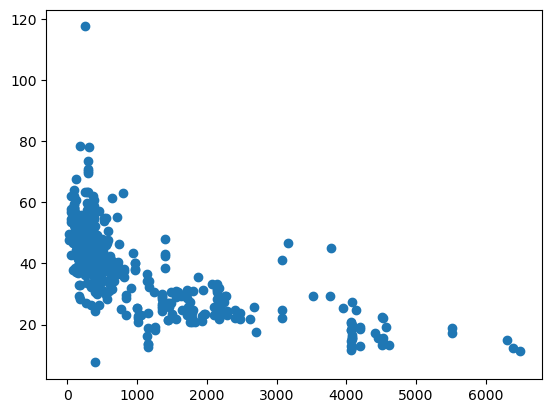

In [125]:
estate=pd.read_csv("Real estate.csv")
X=estate[['X3 distance to the nearest MRT station']]
y=estate['Y house price of unit area']
plt.scatter(X,y)

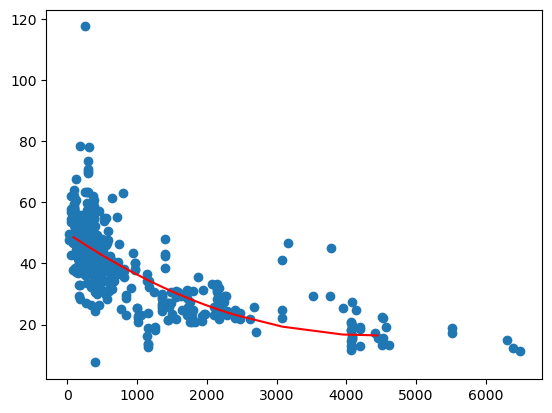

In [126]:
x_train,x_test,y_trainn,y_testt=train_test_split(X,y,random_state=2,test_size=0.1)
poly2=PolynomialFeatures(degree=2)
Z=pd.concat([x_test,y_testt],axis=1)
Z.sort_values(by=Z.columns[0],inplace=True)
X_sorted=Z[['X3 distance to the nearest MRT station']]
X_train_trans=poly2.fit_transform(x_train)
X_test_trans=poly2.transform(X_sorted)
lr2=LinearRegression()
lr2.fit(X_train_trans,y_trainn)
plt.scatter(X,y)
plt.plot(X_sorted,lr2.predict(X_test_trans),c='red')

In [127]:
from sklearn.metrics import r2_score,root_mean_squared_error
r2_score(y_true=Z['Y house price of unit area'],y_pred=lr2.predict(X_test_trans))


0.483138363989727

In [128]:
root_mean_squared_error(y_true=Z['Y house price of unit area'],y_pred=lr2.predict(X_test_trans))

8.63216530150886

In [129]:
type(x_train)

pandas.core.frame.DataFrame

In [130]:
Z

,X3 distance to the nearest MRT station,Y house price of unit area
70,90.45606,59.0
342,90.45606,53.5
412,104.81010,52.5
381,132.54690,47.3
209,175.62940,40.9
322,187.48230,33.1
181,201.89390,55.9
289,289.32480,44.5
294,335.52730,38.1
335,337.60160,36.5
